# Capstone Project - ALY 6140 Analytical System Technology

In [136]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Data Extraction

Data extraction and some part of data cleaning is also done in python script file. I am writing this part for analysis and continuation of project story. Alternatively we can start the project from importing python files which has provided in assignement below from section "Import and call from python script".

In [137]:
url = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip").read()
file = ZipFile(BytesIO(url))
bank_csv = file.open('bank-full.csv')
bank = pd.read_csv(bank_csv, delimiter=';')

In [138]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


The above data was extracted from UCI machine learning repository. This dataset is about direct phone calls made to customers to promote the term deposits in the bank by existing customers. My main objective is to increase the effectiveness of the bank's telemarketing campaign.

By analyzing the customer features, their demographic information and transaction history, we will be able to predict the customer's savings behaviour and we will be able to identify the customer group to focus for marketing campaign. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisement for certain customers.

# Part 2 - Data Cleaning

In [139]:
# Checking for any null or missing values in data
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no missing value in the dataset. Nevertheless, there are various values such as "unknown" and "others" in dataset which are of no use like any missing values. Thus we will remove these ambiguous values.

In [140]:
# Deleting rows in column "poutcome" containing "others" as poutcome represents the result of previous marketing campaign and value other is not of any use
condition = bank.poutcome == 'other'
bank1 = bank.drop(bank[condition].index, axis = 0, inplace = False)

In [141]:
# We will replace the value of " unknown" in job and education column with " other"
bank1[['job','education']] = bank1[['job','education']].replace(['unknown'],'other')

In [142]:
# We will have to drop the outliers in the column "balance" if they are more than three standard deviation.
from scipy.stats import zscore

bank1[['balance']].mean()
bank1[['balance']].mean()

bank1['balance_outliers'] = bank1['balance']
bank1['balance_outliers']= zscore(bank1['balance_outliers'])

condition1 = (bank1['balance_outliers']>3) | (bank1['balance_outliers']<-3 )
bank2 = bank1.drop(bank1[condition1].index, axis = 0, inplace = False)

In [143]:
bank3 = bank2.drop('balance_outliers', axis=1)

# Import and call from python script

In [144]:
# We can call the function from python file to change column name y to response and will change them into numeric
import Tarte_Shreenidhi_Capstone_Project
%run Tarte_Shreenidhi_Capstone_Project
bank3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1


In [145]:
# We will drop the column "contact" which useless and not providing any important information
bank4 = bank3.drop('contact', axis=1)

In [146]:
# We will change the unit of duration from seconds to minutes
bank4['duration'] = bank4['duration'].apply(lambda n:n/60).round(2)

In [147]:
# We will change the months from numbers to words for easier analysis
lst = [bank4]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [148]:
# We will drop the customer values  with "other" education
condition3 = (bank4['education'] == 'other')
bank5 = bank4.drop(bank4[condition3].index, axis = 0, inplace = False)

In [149]:
# Let's view the clean data
bank5

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5.0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5.0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,5.0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,11.0
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,11.0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,11.0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,11.0


# Part 3 - Exploratory Data Analysis

To obtain better understanding of the dataset, key distribution of data points and it's variables are important. Let's see the various distributions of the data.

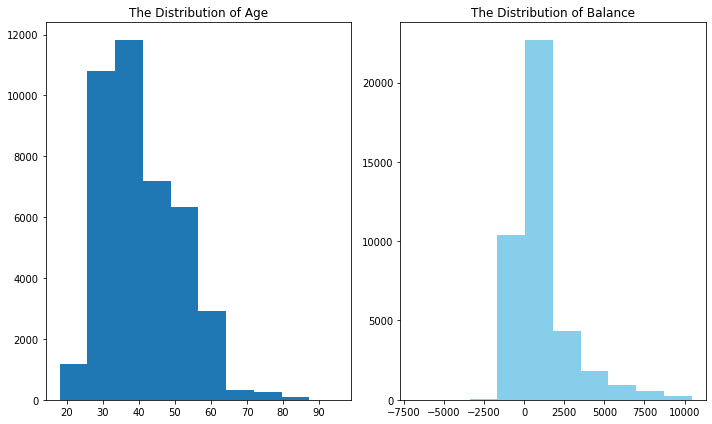

In [150]:
# Let's visulalize the distribution between age and balance
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(bank5['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(bank5['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

The distribution of age shows that the there was more focused on the people between the age 30 and 40. The distribution of age is fairly normal with small standard deviation. 
After dropping outliers in balance the range of outliers is still massive from minimum -6847 to maximum 10443 euros, which gives us the range of 17290 euros. This distribution has huge standard deviation relative to mean.

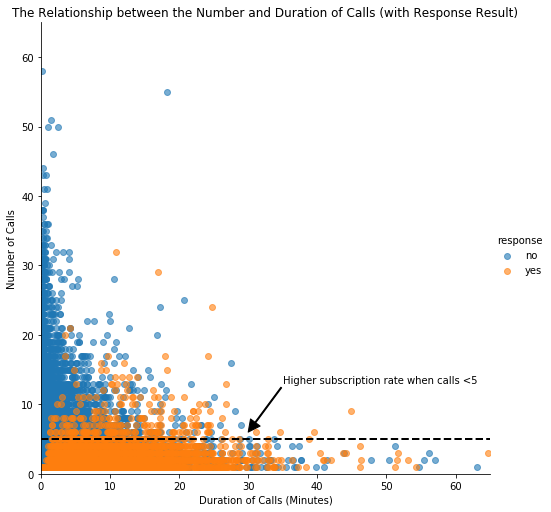

In [151]:
# Let's visualize the relationship between duration and campaign with response result.
dur_cam = sns.lmplot(x='duration', y='campaign',data = bank5,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatterplot , clients subscribed to term deposits are termed as "yes" and those who didn't termed as "No". As we can see from scatterplot "yes" and "no" clients are forming two separate clusters. compared to "no" clients "yes" clients was contacted more times with longer duration of call. We can see that after five campaign calls clients are likely to reject opt for the term deposits unless the duration is high. Most "yes" clients were approached less than 10 times. 

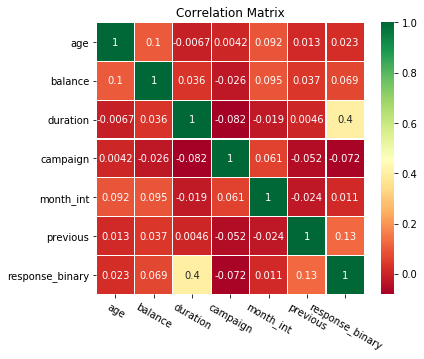

In [152]:
# Let's see the correlation between the various variables.
corr_data = bank5[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

We have plotted correlation matrix with all qualitative variables. We can see that "campiagn outcome" has strong correlationship with "duration", moderate correlationship with "previous contact" and mid correlation between the "age", "balance", "month of contact", "number of campaign". 

# Part 4 - Data Visualization

In [153]:
# Let's visualize the subscription rate of age and balance in each age group.
# Let's define the age groups
lst = [bank5]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(bank5['response'],bank5['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(bank5['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

In [154]:
# Let's define the balance groups
lst = [bank5]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(bank5['response'],bank5['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(bank5['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

In [155]:
age_balance1 = pd.DataFrame(bank5.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(bank5.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

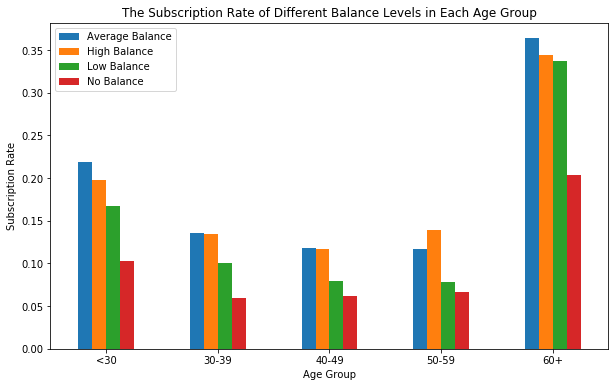

In [156]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

As age represents life stage and bank balance represents the financial position of a person, throgh the combination of these two variables we will be able to more investigate that the person can invest in the term deposits or not.

This graph tells us the same story that the people age 60+ and yonger age below 20 are more likely to invest and save the money also has highest subscription rate.

The bank shhould prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have highest acceptance rate of about 35%. The next age group bank should focus on young people who has positive balances, who showed high subscription rate between 15% to 20%

In [157]:
# Let's visualize subscrition rate by job category
count_job_response_pct = pd.crosstab(bank5['response'],bank5['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

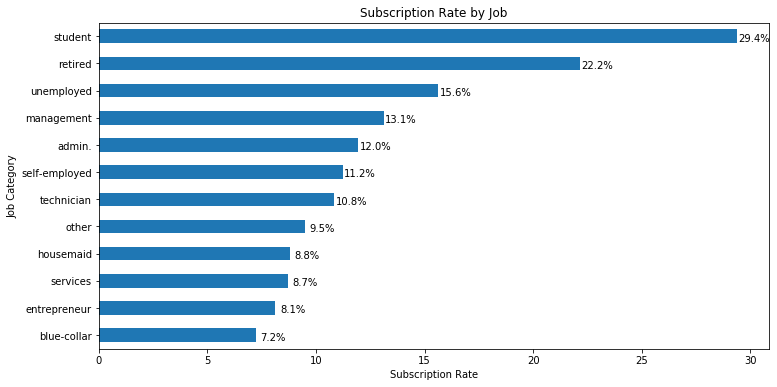

In [158]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Students and the retired people have more subscrition rate which is more than 50%. We can see that it is consistent with our previous finding in the age group wise subscription rate.

In [159]:
# Now let's visualize the subscription rate and contacted month so that we can see that in what month more people are subcribed to term deposits.
count_month_response_pct = pd.crosstab(bank5['response'],bank5['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [160]:
month = pd.DataFrame(bank5['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

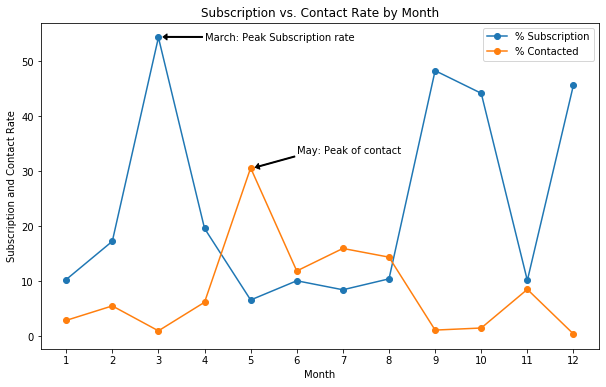

In [161]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

Alongwith the customer statistics, there are other various external factors which are important such as season and time of calling to customers. The line chart displays the bank's contact rate in each month and client's response rate in each month. 

We can see that bank contacted most of the clients between May and August. The highest contact rate is around 30%, which happened in May. Howerver, subscription rate showed a different trend, the highest subscription rate was in March which is more than 50% and subscription rate in September, October and December month was more than 40%.

These two lines are moving in a different directions which strongly indicates that inappropriate timing of the bank's marketing campaign. To improve the marketing campaugn bank should consider a period of fall and spring where subscription rates are high.

# Part 5 - Predictive Analysis

The main objective of our project is to identify the most responsive customers before the marketing campaign so that the bank can focus on such group of customers and save the its timing and can work efficiently by saving cost of the bank. We will build a predictive model to classify the all clients into two groups, "yes" and "no" to term deposits.

In [162]:
# Let's load the clean data
bank4

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5.0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5.0
3,47,blue-collar,married,other,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,0,5.0
4,33,other,single,other,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,11.0
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,11.0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,11.0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,11.0


In [163]:
# We will select only those variable which are relevant to customers
bank4.drop(['marital'],axis=1, inplace=True)
bank6 = bank4.iloc[:, 0:7]

In [164]:
# We will transform some categorical data into dummy variables
bank7 = pd.get_dummies(bank6, columns = ['job'])
bank7 = pd.get_dummies(bank7, columns = ['education'])
bank7['housing'] = bank7['housing'].map({'yes': 1, 'no': 0})
bank7['default'] = bank7['default'].map({'yes': 1, 'no': 0})
bank7['loan'] = bank7['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(bank4['response_binary'])
bank7 = pd.merge(bank7, dataset_response, left_index = True, right_index = True)

In [165]:
# Let's see the cleaned data for predictions
bank7

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_other,education_primary,education_secondary,education_tertiary,response_binary
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,0,505,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45206,51,0,825,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,0,1729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45208,72,0,5715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Now we will create an array by taking first 20 columns as independent variables and last response binary taking as an dependent variable.

In [166]:
array = bank7.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [167]:
# Let's divide the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [168]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

We will run four different methods on the data. They are Logistics Regression, K-Neighbours classifier, Decision tree and Guassian Naive Bayes. We will opt for best accurate method. 

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [170]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [171]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=20)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\nihal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nihal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LR: 0.885594 (0.007375)
KNN: 0.874927 (0.007703)
CART: 0.833782 (0.005991)
NB: 0.817723 (0.008512)


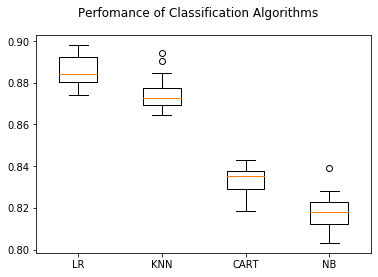

In [172]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

From the above all models we can see that the logistic regression is the best performing model as it has accuracy of about 88%. This model has high level of strength of predicting and classifying customer response for all customer features.

In [173]:
# Testing Logistic Regression model on testing dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)

C:\Users\nihal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
# Evaluating Logistic Regression model
predictions = LR.predict(X_test)

In [175]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.886765912554214


Accuracy is the correct percentage of prediction of all predictions. Our model is showing 88.67% accuracy stating that our model has high level strength to classify and predict the data.

[[7565    0]
 [ 966    0]]


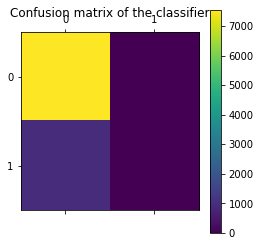

In [176]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

The above confusion matrix gives the complete breakup of the prediction results and error types. The matrix proves that the algorithm performed well because most test results (7565 True Positive predictions) locate on diagonal cells which represents correct prediction. 966 tests (False negative) predicted bank's client would subscribe to term deposit but they actually did not.

There is big problem revealed by this confusion matrix is that the dataset is highly imbalance, that most of the clients has declined to subscribe for term deposits.

In [177]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7565
           1       0.00      0.00      0.00       966

    accuracy                           0.89      8531
   macro avg       0.44      0.50      0.47      8531
weighted avg       0.79      0.89      0.83      8531



C:\Users\nihal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above classification reposrt shows the precision, recall, F1 score and support. 

We can see that precision of 0 represents instances predicted as no subscription, and the percentage of no subscription is 89%.
Recall is the ability of the classifier to find all true positive instances. Recall of 0 indicates that all clients that actually says no, the model predicts 100%  correctly that they would decline the offer.

# Part 6 - Conclusion

1) From the above analysis I have concluded that the bank should target the customer age greater than 60 and younger age people    less than age 20.

2) By using Logistic Regression, bank will be able to predict customer's response to it's telemarketing campaign before calling    its customers. In this way, bank can allocate more marketing efforts to the clients who are classified as highly likely to      accept term deposits, and call less to those who are predicted as not subscribed to term deposits.

3) With the aid of logistics regression model, bank can enter a virtous cycle of effective marketing, more ivestment and happy      customer. It is recommended to bank that, they should focus more on more appropriate timing, smart marketing design and          better services provision. 